### Import libraries

This notebook can be run after downloading the ***PY_Analysis*** module from https://github.com/asitha-sena/PY_Analysis. The code will only work with **Python3** branch of this git repository. 

In [1]:
import sys
sys.path.append('c:/Temp/PY_Analysis')

import py_monotonic

import numpy as np
import matplotlib.pyplot as plt

### Structure of module

This module is written in the functional style of programming where each step/component of the model is defined by a function. These functions can be assembled together to build a model of a laterally loaded pile and then perform a p-y analysis. A model consists of the following components:
1. Ground model or idealized soil profile
    * *py_monotonic.design_soil_profile_SI()*
2. p-y curves
    * *matlock_py_curves_SI()*
3. Finite-difference solver
    * *fd_solver_1()*
    * *fd_solver_2()*
4. Pile dimensions and material

The above components can be assembled in a "main" function by the user. The following pre-built main functions are available:

1. py_analysis_1_SI()
    * Analyse a pipe pile with user defined boundary conditions at the pile head ($F_0, V_0, M_0$) and pile tip ($V_n, M_n$).
2. py_analysis_2_SI()
    * Analyse a pipe pile with user defined boundary conditions at the pile head ($F_0, y_0, M_0$) and pile tip ($V_n, M_n$).


### Define $S_u$ versus depth profile

The soil profile is defined as a numpy array with depths defined relative to the pile head. The docstring in ***py_monotonic.design_soil_SI*** explains details of this input array.

This function converts the soil profile defined by the input array and outputs:
* The location of the mudline relative to the pile head ($z_0$)
* An interpolation function to calculate $S_u$ given the depth relative to the pile head
* An interpolation function to calculate $\sigma_v'$ given the depth relative to the pile head

These parameters and functions are used to calculate the p-y curves.

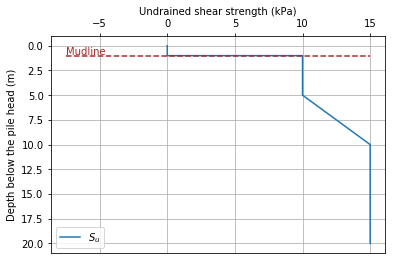

In [80]:
#                         Depth  Su   γ_sub  p-y model          p-y parameters
soil_profile = np.array([[1.0,  10.0,  10., 'Name of p-y model', 0.02],
                         [5.0,  10.0, 10., 'Name of p-y model', 0.02],
                         [10.0, 15.0, 10., 'Name of p-y model', 0.02],
                         [20.0, 15.0, 10., 'Name of p-y model', 0.02]])

z0, f_Su, f_σ_v_eff = py_monotonic.design_soil_profile_SI(soil_profile, plot_profile='Yes')

### Example 1 - Free-head pile with lateral load

The function ***py_monotonic.py_analysis_1_SI*** can be used to analyze a free-head pile with lateral load, axial load, and moment applied to it.

Please note that a **ValueError** will be returned if the length of the pile is greater than the defined depth of the soil profile.

y_0 = 0.051-m


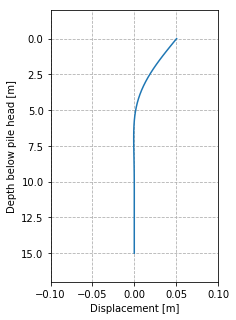

In [14]:
#Idealized soil profile
soil_profile = np.array([[1.0,  1.0,  10., 'Name of p-y model', 0.02],
                         [5.0,  10.0, 10., 'Name of p-y model', 0.02],
                         [10.0, 10.0, 10., 'Name of p-y model', 0.02],
                         [20.0, 15.0, 10., 'Name of p-y model', 0.02]])

z0, f_Su, f_σ_v_eff = py_monotonic.design_soil_profile_SI(soil_profile)

#Pile dimensions
L = 15.0  #m, pile length
D = 0.25  #m, pile diameter
t = 0.01  #m, pile wall thickness
E = 200e9 #Pa, Elastic modulus of steel

#Pile head loads
V_0 = 12e3 #N,  horizontal load on pile head
M_0 = 0    #Nm, moment on pile head
F_0 = 50e3 #N,  vertical load on pile head

y,z = py_monotonic.py_analysis_1_SI(soil_profile, L=L, D=D, t=t, E=E, F=F_0, V_0=V_0, M_0=M_0, print_output='Yes')

#Plot deflection profile of pile
fig, ax = plt.subplots(figsize=(3,5))

ax.plot(y,z)

ax.set_xlabel('Displacement [m]')
ax.set_ylabel('Depth below pile head [m]')
ax.set_ylim([L+2,-2])
ax.set_xlim([-0.1, 0.1])
ax.grid(ls='--')

### Example 2 - Free-head pile with lateral displacement

The function ***py_monotonic.py_analysis_2_SI*** can be used to analyze a free-head pile with lateral displacement, axial load, and moment applied to it.

Please note that a **ValueError** will be returned if the length of the pile is greater than the defined depth of the soil profile.

V_0 = 10016.18-N


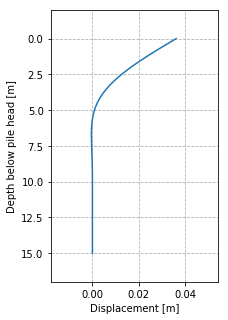

In [12]:
#Idealized soil profile
soil_profile = np.array([[1.0,  1.0,  10., 'Name of p-y model', 0.02],
                         [5.0,  10.0, 10., 'Name of p-y model', 0.02],
                         [10.0, 10.0, 10., 'Name of p-y model', 0.02],
                         [20.0, 15.0, 10., 'Name of p-y model', 0.02]])

z0, f_Su, f_σ_v_eff = py_monotonic.design_soil_profile_SI(soil_profile)

#Pile dimensions
L = 15.0  #m, pile length
D = 0.25  #m, pile diameter
t = 0.01  #m, pile wall thickness
E = 200e9 #Pa, Elastic modulus of steel

#Pile head loads
y_0 = 0.036 #m,  horizontal displacement at pile head
M_0 = 0    #Nm, moment on pile head
F_0 = 0    #N,  vertical load on pile head

y,z, V_0 = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y_0, print_output='Yes')

#Plot deflection profile of pile
fig, ax = plt.subplots(figsize=(3,5))

ax.plot(y, z)

ax.set_xlabel('Displacement [m]')
ax.set_ylabel('Depth below pile head [m]')
ax.set_ylim([L+2,-2])
ax.set_xlim([-0.5*y_0, 1.5*y_0])
ax.grid(ls='--')

### Matlock & Tucker (1961) - Sabine River Test

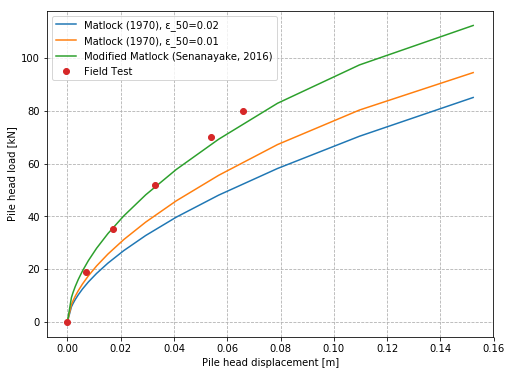

In [33]:
#Design soil profile
soil_profile = np.array([[0.304, 9.58,  10., 'Matlock', 0.02],
                         [15.23, 33.52, 10., 'Matlock', 0.02]])

#Pile dimensions
L = 516./39.4   #m, pile length
D = 12.75/39.4  #m, pile diameter
t = 0.5/39.4    #m, pile wall thickness
E = 210e9       #Pa, Elastic modulus of steel

#Python P-Y analysis
y = 6*np.concatenate([np.array([0]),np.logspace(-2,0,15)/39.4])
V1 = np.zeros(len(y))
V2 = np.zeros(len(y))
V3 = np.zeros(len(y))

for i in range(len(y)-1):
    temp1, temp2, V1[i+1] = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y[i+1], n=50, iterations=10, 
                                                          convergence_tracker='No', py_model='Matlock', print_output='No',
                                                          epsilon_50=0.02)
    temp1, temp2, V2[i+1] = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y[i+1], n=50, iterations=10, 
                                                          convergence_tracker='No', py_model='Matlock', print_output='No',
                                                          epsilon_50=0.01)
    temp1, temp2, V3[i+1] = py_monotonic.py_analysis_2_SI(soil_profile, L=L, D=D, t=t, E=E, y_0=y[i+1], n=50, iterations=10, 
                                                          convergence_tracker='No', py_model='MM-1', print_output='No',
                                                          epsilon_50=0.01)
    
#Plot pile head load vs displacement
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(y,V1/1000., label='Matlock (1970), ε_50=0.02')
ax.plot(y,V2/1000., label='Matlock (1970), ε_50=0.01')
ax.plot(y,V3/1000., label='Modified Matlock (Senanayake, 2016)')

#Field test result
p1 = np.array([0.0,4.3,7.9,11.7,15.8,18.01])     
y1 = np.array([0.00,0.28,0.67,1.30,2.13,2.60])

ax.plot(y1/39.4, p1*4.45, 'o', label='Field Test')

#Axes labels, grid, legend
ax.set_xlabel('Pile head displacement [m]')
ax.set_ylabel('Pile head load [kN]')
ax.grid(ls='--')
ax.legend()